Task 1: Absorbing Boundary Conditions

For the 1-dimensional wave equation given by
\begin{equation}
\dfrac{\partial^2 U}{\partial x^2} = \dfrac{1}{c^2} \dfrac{\partial^2 U}{\partial t^2} 
\end{equation}
we can define an operator $G$ where
\begin{equation}
G = \dfrac{\partial^2}{\partial x^2} - \dfrac{1}{c^2} \dfrac{\partial^2}{\partial t^2} 
\end{equation}
so that the wave equation can be written easily as
\begin{equation}
GU = 0
\end{equation}
We can separate $G$ such that
\begin{equation}
G = G^+ G^-
\end{equation}
\begin{equation}
G^+ = \dfrac{\partial}{\partial x} + \dfrac{1}{c} \dfrac{\partial}{\partial t}
\end{equation}
\begin{equation}
G^- = \dfrac{\partial}{\partial x} - \dfrac{1}{c} \dfrac{\partial}{\partial t}
\end{equation}
and it was previously shown that at the left side of the boundary, where $x=0$,
\begin{equation}
G^-U = 0 \qquad \longrightarrow \qquad \dfrac{\partial U}{\partial x} - \dfrac{1}{c} \dfrac{\partial U}{\partial t} = 0
\end{equation}
and at the right side, at $x=d$,
\begin{equation}
G^+U = 0 \qquad \longrightarrow \qquad \dfrac{\partial U}{\partial x} + \dfrac{1}{c} \dfrac{\partial U}{\partial t} = 0
\end{equation}
We take the time derivative of both of the equations above in order to obtain a form similar to that of the text
\begin{equation}
\dfrac{\partial^2 U}{\partial x \partial t} - \dfrac{1}{c} \dfrac{\partial^2 U}{\partial t^2} = 0 \qquad \mathrm{at} \, x = 0
\end{equation}
\begin{equation}
\dfrac{\partial^2 U}{\partial x \partial t} + \dfrac{1}{c} \dfrac{\partial^2 U}{\partial t^2} = 0 \qquad \mathrm{at} \, x = d
\end{equation}

Using the following expressions for the partial derivatives
\begin{equation}
\left . \dfrac{\partial^2 W}{\partial x \partial t} \right |^n_{1/2} = \dfrac{1}{2} \left [ \left( \dfrac{W \big|_{1}^{n+1} - W \big|_{0}^{n+1} }{\Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{1}^{n-1} - W \big|_{0}^{n-1} }{\Delta t \Delta x} \right ) \right ] = \dfrac{1}{2} \left [ \left( \dfrac{W \big|_{i}^{n+1} - W \big|_{i-1}^{n+1} }{\Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{i}^{n-1} - W \big|_{i-1}^{n-1} }{\Delta t \Delta x} \right ) \right ]
\end{equation}
\begin{equation}
\left . \dfrac{\partial^2 W}{\partial t^2} \right |^n_{1/2} = \dfrac{1}{2} \left [ \left ( \dfrac{W \big|^{n+1}_{0} - 2 W \big|^{n}_{0} + W \big |^{n-1}_{0}}{(\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{1} - 2 W \big|^{n}_{1} + W \big |^{n-1}_{1}}{(\Delta t)^2} \right ) \right ] = \dfrac{1}{2} \left [ \left ( \dfrac{W \big|^{n+1}_{i-1} - 2 W \big|^{n}_{i-1} + W \big |^{n-1}_{i-1}}{(\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{i} - 2 W \big|^{n}_{i} + W \big |^{n-1}_{i}}{(\Delta t)^2} \right ) \right ]
\end{equation}

So at $x=0$,

\begin{equation}
\left [ \left( \dfrac{W \big|_{1}^{n+1} - W \big|_{0}^{n+1} }{2 \Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{1}^{n-1} - W \big|_{0}^{n-1} }{2 \Delta t \Delta x} \right ) \right ] -  \left [ \left ( \dfrac{W \big|^{n+1}_{0} - 2 W \big|^{n}_{0} + W \big |^{n-1}_{0}}{2c (\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{1} - 2 W \big|^{n}_{1} + W \big |^{n-1}_{1}}{2c (\Delta t)^2} \right ) \right ]=0
\end{equation}


\begin{equation}
\dfrac{W \big|_{1}^{n+1}}{2 \Delta t \Delta x} - \dfrac{W \big|_{0}^{n+1} }{2 \Delta t \Delta x} - \dfrac{W \big|_{1}^{n-1}}{2 \Delta t \Delta x} + \dfrac{W \big|_{0}^{n-1} }{2 \Delta t \Delta x} - \dfrac{W \big|^{n+1}_{0}}{2c (\Delta t)^2}  + \dfrac{2 W \big|^{n}_{0}}{2c (\Delta t)^2} - \dfrac{W \big |^{n-1}_{0}}{2c (\Delta t)^2} - \dfrac{W \big|^{n+1}_{1}}{2c (\Delta t)^2} + \dfrac{2 W \big|^{n}_{1}}{2c (\Delta t)^2} - \dfrac{W \big |^{n-1}_{1}}{2c (\Delta t)^2} = 0
\end{equation}

\begin{equation}
-W \big|_{1}^{n-1} \left( \dfrac{\Delta x + c \Delta t}{2c (\Delta t)^2 \Delta x} \right ) + W \big|_{1}^{n+1}\left(\dfrac{c \Delta t - \Delta x}{2c (\Delta t)^2 \Delta x}\right )+W \big|_{0}^{n-1}\left(\dfrac{c \Delta t - \Delta x}{2c (\Delta t)^2 \Delta x}\right )+\dfrac{1}{2c (\Delta t)^2} \left( {2 W\big|^{n}_{0}}+ {2 W \big|^{n}_{1}}\right )= W \big|^{n+1}_{0}\left(\dfrac{\Delta x + c \Delta t}{2c (\Delta t)^2 \Delta x}\right )
\end{equation}

\begin{equation}
W \big|^{n+1}_{0} = - W \big|_{1}^{n-1} + \left(\dfrac{c \Delta t - \Delta x}{c \Delta t + \Delta x}\right )\left (W \big|_{1}^{n+1}+W \big|_{0}^{n-1}\right )+\dfrac{2 \Delta x}{c \Delta t + \Delta x}\left( {W \big|^{n}_{0}}+ {W \big|^{n}_{1}}\right )
\end{equation}

And at $x=d$,

\begin{equation}
\left [ \left( \dfrac{W \big|_{i}^{n+1} - W \big|_{i-1}^{n+1} }{2 \Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{i}^{n-1} - W \big|_{i-1}^{n-1} }{2 \Delta t \Delta x} \right ) \right ] +  \left [ \left ( \dfrac{W \big|^{n+1}_{i-1} - 2 W \big|^{n}_{i-1} + W \big |^{n-1}_{i-1}}{2c (\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{i} - 2 W \big|^{n}_{i} + W \big |^{n-1}_{i}}{2c (\Delta t)^2} \right ) \right ]=0
\end{equation}

\begin{equation}
\left( \dfrac{W \big|_{i}^{n+1} - W \big|_{i-1}^{n+1} }{2 \Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{i}^{n-1} - W \big|_{i-1}^{n-1} }{2 \Delta t \Delta x} \right ) +  \left ( \dfrac{W \big|^{n+1}_{i-1} - 2 W \big|^{n}_{i-1} + W \big |^{n-1}_{i-1}}{2c (\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{i} - 2 W \big|^{n}_{i} + W \big |^{n-1}_{i}}{2c (\Delta t)^2} \right ) = 0
\end{equation}


\begin{equation}
\dfrac{W \big|_{i}^{n+1}}{2 \Delta t \Delta x} - \dfrac{W \big|_{i-1}^{n+1} }{2 \Delta t \Delta x} - \dfrac{W \big|_{i}^{n-1}}{2 \Delta t \Delta x} + \dfrac{W \big|_{i-1}^{n-1} }{2 \Delta t \Delta x} + \dfrac{W \big|^{n+1}_{i-1}}{2c (\Delta t)^2}  - \dfrac{2 W \big|^{n}_{i-1}}{2c (\Delta t)^2}  + \dfrac{W \big |^{n-1}_{i-1}}{2c (\Delta t)^2} + \dfrac{W \big|^{n+1}_{i}}{2c (\Delta t)^2}  - \dfrac{2 W \big|^{n}_{i}}{2c (\Delta t)^2}  + \dfrac{W \big |^{n-1}_{i}}{2c (\Delta t)^2} 
= 0
\end{equation}

\begin{equation}
W \big|_{i}^{n+1}\left( \dfrac{c \Delta t + \Delta x}{2 c (\Delta t)^2 \Delta x} \right)+W \big |^{n-1}_{i}
\left(\dfrac{c \Delta t - \Delta x}{2 c (\Delta t)^2 \Delta x}\right)+W \big|_{i-1}^{n-1}\left(\dfrac{c \Delta t + \Delta x}{2 c (\Delta t)^2 \Delta x}\right )- \dfrac{1}{c (\Delta t)^2}\left(W \big|^{n}_{i}- W \big|^{n}_{i-1}
\right)= W \big|_{i-1}^{n+1}\left(\dfrac{c \Delta t - \Delta x}{2 c (\Delta t)^2 \Delta x}\right)
\end{equation}

\begin{equation} 
W \big|_{i-1}^{n+1} = W \big |^{n-1}_{i}+(W \big|_{i}^{n+1} + W \big|_{i-1}^{n-1})\left(\dfrac{c \Delta t + \Delta x}{c \Delta t - \Delta x}\right )- \dfrac{2 \Delta x}{c \Delta t - \Delta x}\left(W \big|^{n}_{i}- W \big|^{n}_{i-1}
\right)
\end{equation}

/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/home/grayzaghnal/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


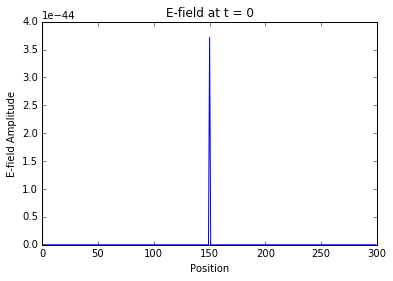

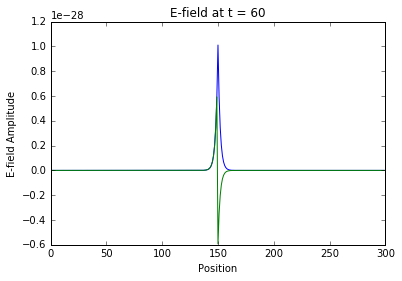

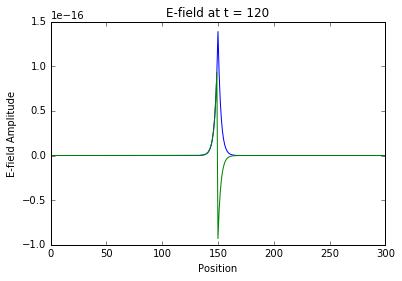

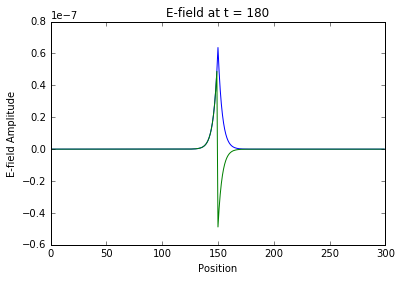

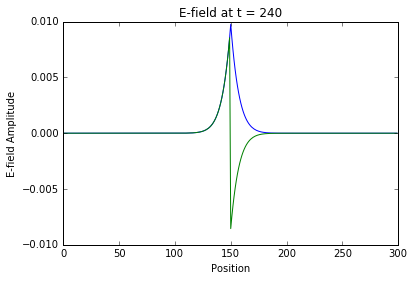

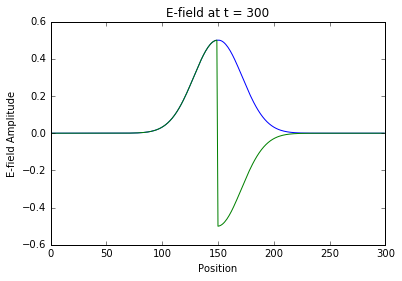

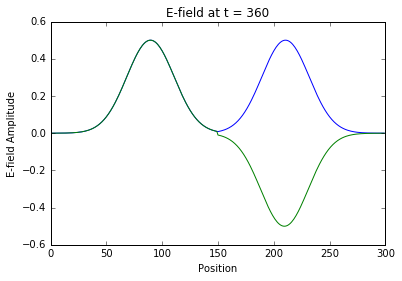

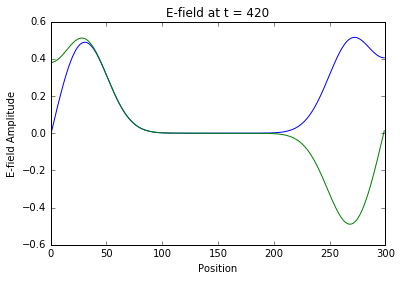

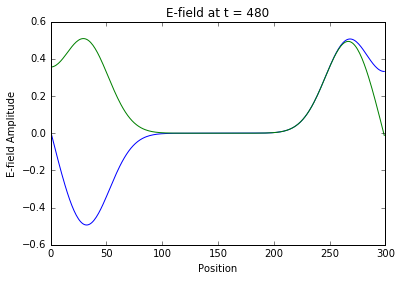

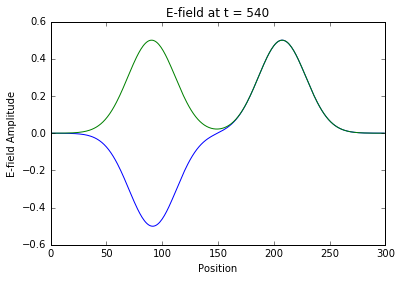

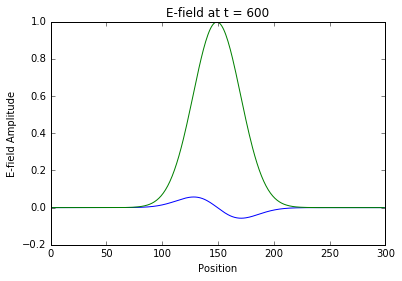

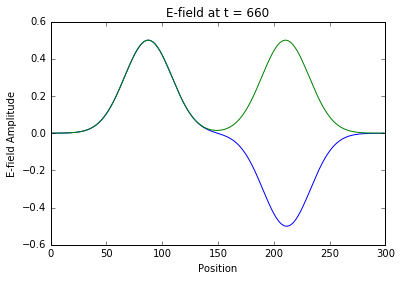

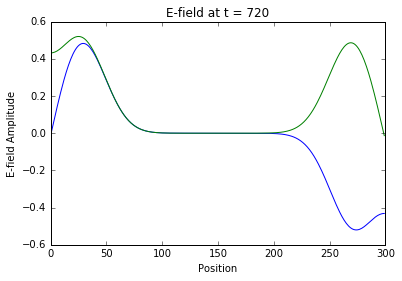

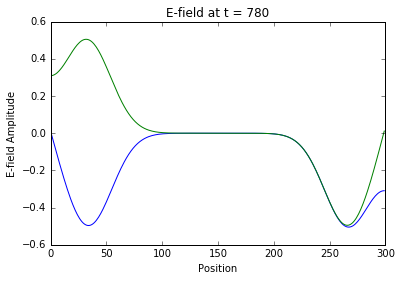

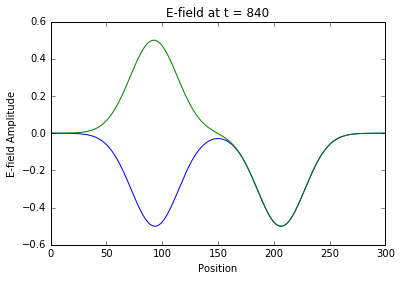

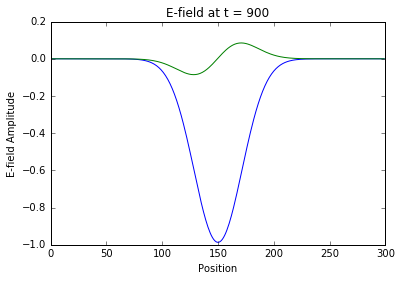

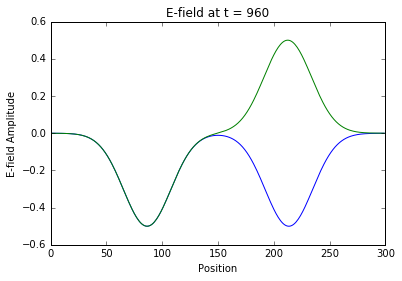

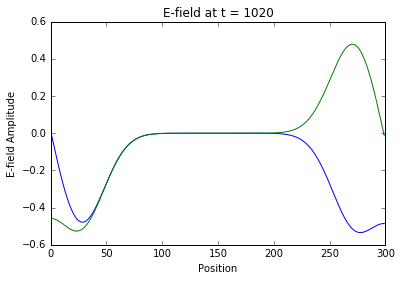

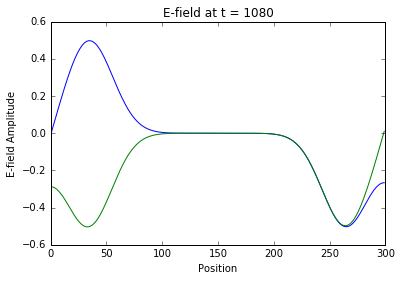

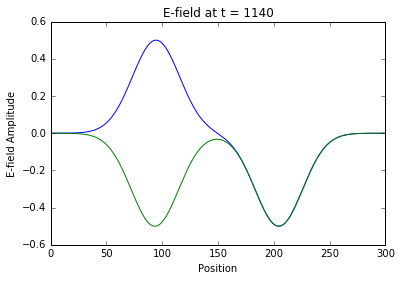

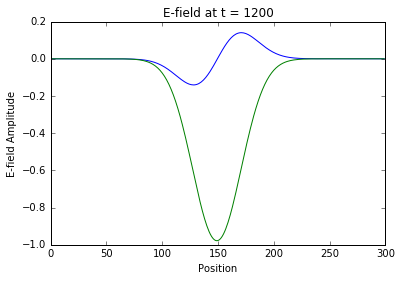

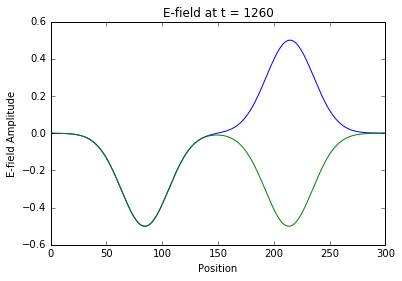

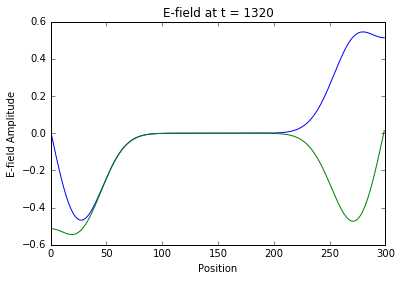

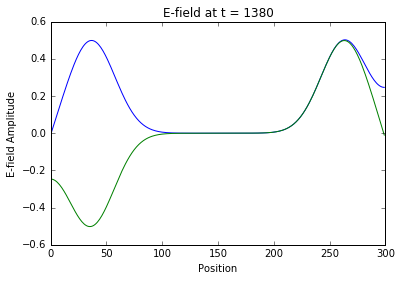

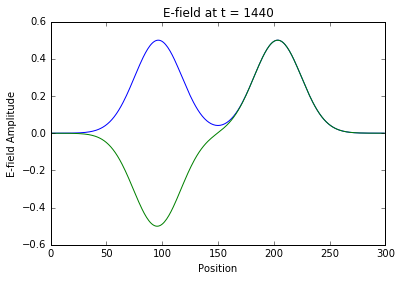

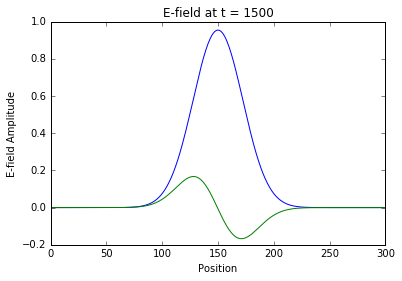

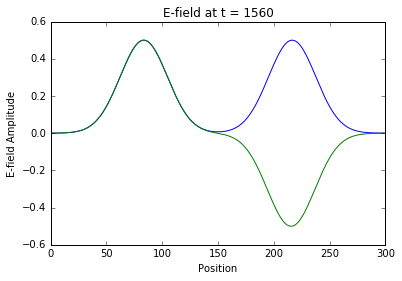

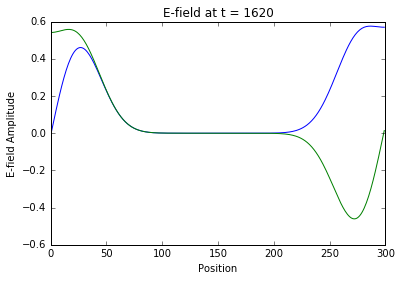

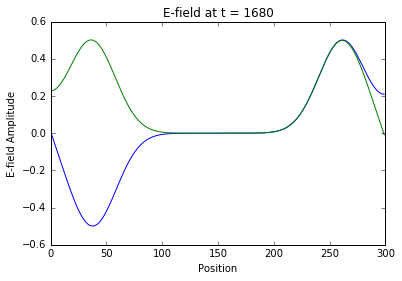

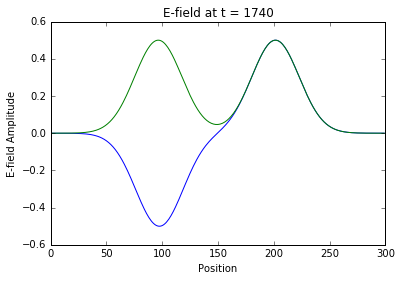

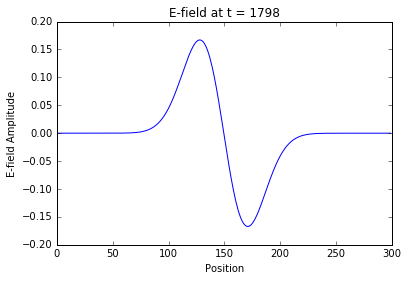

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
#from matplotlib import animation

import numpy as np
import math as m

nx = 300

imp0 = 337.0 #impedance

#initialize the fields at zero
ez = np.zeros(nx)
hy = np.zeros(nx)
x = np.arange(0,nx-1,1)

epsilon = 1
#eps= np.ones(nx)
#eps[:] = epsilon

#Source 
srcori = int(nx/2) #source is at center
srcwid = 30.0*np.sqrt(epsilon) #source width
srcdel = 10*srcwid #source delay
nt = int(3*(nx+srcdel)*np.sqrt(epsilon))

# setting  ABC constants _AFTER_ epsilon (we need speed of ligth in media)
# Taflove, eq. 6.35
c = 1/np.sqrt(epsilon)
# here, we have dx and dt be both equal to one
a = (c-1)/(c+1)
b = 2/(c + 1)
u = (c+1)/(c-1)
v = 2/(c - 1)

# Left boundary (set to zero because everything is initially zero)
hwnp10, ewnp10 = 0,0 # W | ^{n+1} _{0}
hwnm11, ewnm11 = 0,0 # W | ^{n-1} _{1}
hwnp11, ewnp11 = 0,0 # W | ^{n+1} _{1}
hwnm10, ewnm10 = 0,0 # W | ^{n-1} _{0}
hwn0  , ewn0   = 0,0 # W | ^{n  } _{0}
hwn1  , ewn1   = 0,0 # W | ^{n  } _{1}
#wl_nm1,wl_n,wl_np1 = 0,0,0 # Field at x=0 at time steps n-1, n, n+1
#wlp1_nm1,wlp1_n,wlp1_np1 = 0,0,0 # Field at x=1 at time steps n-1, n, n+1
# Right boundary
hwnp1im1, ewnp1im1 = 0,0 # W | ^{n+1} _{i-1}
hwnm1i  , ewnm1i   = 0,0 # W | ^{n-1} _{i  }
hwnp1i  , ewnp1i   = 0,0 # W | ^{n+1} _{i  }
hwnm1im1, ewnm1im1 = 0,0 # W | ^{n-1} _{i-1}
hwnim1  , ewnim1   = 0,0 # W | ^{n  } _{i-1}
hwni    , ewni     = 0,0 # W | ^{n  } _{i  }
#wr_nm1,wr_n,wr_np1 = 0,0,0 # Field at x=size at time steps n-1, n, n+1
#wrm1_nm1,wrm1_n,wrm1_np1 = 0,0,0 # Field at x=size-1 at time steps n-1, n, n+1


fignum = 0
for dt in range(0,nt):
    ######################
    #Magnetic field
    ######################
    hy[x] = hy[x] + (ez[x+1] - ez[x])/imp0
    #Evaluate Mur ABC value (eq. 6.35 Taflove)
#    hy[0] = - hy[1] + a*(hwnp11 + hwnm10) + b*(hwn0 + hwn1)
#    hy[-1] = hy[-2] + u*(hwnm1im1+hwnm1i) - v*(hwni - hwnim1)
    hy[-1] = - hy[-2] + a*(hwnm1im1+hwnm1i) + b*(hwni + hwnim1)
    hwnm1im1, hwnm1i = hwnim1, hwni
    hwnim1, hwni = hwnp1im1, hwnp1i
#    wrm1_np1 = hy[-2]
#    wr_np1 = -wrm1_nm1 + a*(wrm1_np1+wr_nm1) + b*(wr_n+wrm1_n)
#    hy[-1] = wr_np1
    #Cycle field values at boundary
#    wr_nm1, wrm1_nm1 = wr_n, wrm1_n
#    wr_n, wrm1_n = wr_np1, wrm1_np1
    ######################
    #Electric field
    ######################
#    ez[x+1] = ez[x+1] + (hy[x+1]-hy[x])*imp0/eps[x+1]
    ez[x+1] = ez[x+1] + (hy[x+1]-hy[x])*imp0/epsilon
    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))
    #Evaluate Mur ABC value (eq. 6.35 Taflove)
    ez[0] = - ez[1] + a*(ewnp11 + ewnm10) + b*(ewn0 + ewn1)
#    ez[-1] = ez[-2] + u*(ewnm1im1+ewnm1i) - v*(ewni - ewnim1)
    ewnm10,ewnm11 = ewn0,ewn1
    ewn0,ewn1   = ewnp10,ewnp11
#    wlp1_np1 = ez[1]
#    wl_np1 = -wlp1_nm1 + a*(wlp1_np1+wl_nm1) + b*(wl_n+wlp1_n)
#    ez[0] = wl_np1
    #Cycle field values at boundary
#    wl_nm1, wlp1_nm1 = wl_n, wlp1_n
#    wl_n, wlp1_n = wl_np1, wlp1_np1

    plt.hold(True)
    if (dt % 60 == 0 or dt == nt-2):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.xlabel("Position")
        plt.ylabel("E-field Amplitude")
        plt.title("E-field at t = "+ str(dt))
        plt.plot(ez)
        
        if (dt != nt-2):
            plt.plot(hy*imp0)